In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Simple Phase

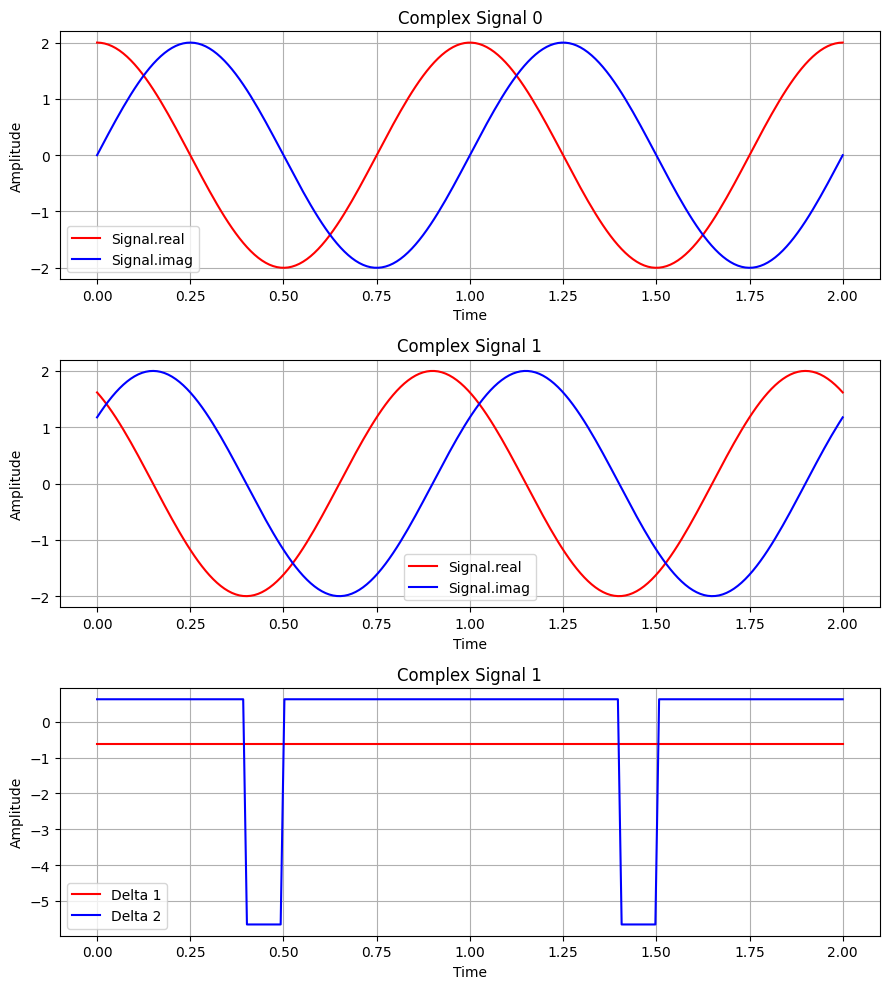

In [53]:
sample_rate = 100
duration_secs = 2
f = 1.0
phi = 1*np.pi/5
A = 2.0

T = np.linspace(0,duration_secs, sample_rate*duration_secs)
x_0 = A * np.e ** (1.0j * (2 * np.pi * f * T + 0))
x_1 = A * np.e ** (1.0j * (2 * np.pi * f * T + phi))

# PLOT
fig, (ax_sig_0, ax_sig_1, ax_phase_delta) = plt.subplots(3, figsize=(9,10))

# Plot signal_0
ax_sig_0.plot(T,x_0.real, color="r", label="Signal.real")
ax_sig_0.plot(T,x_0.imag, color="b", label="Signal.imag")

ax_sig_0.set_title("Complex Signal 0")
ax_sig_0.set_xlabel("Time")
ax_sig_0.set_ylabel("Amplitude")
ax_sig_0.grid()
ax_sig_0.legend()

# Plot signal_1
ax_sig_1.plot(T,x_1.real, color="r", label="Signal.real")
ax_sig_1.plot(T,x_1.imag, color="b", label="Signal.imag")

ax_sig_1.set_title("Complex Signal 1")
ax_sig_1.set_xlabel("Time")
ax_sig_1.set_ylabel("Amplitude")
ax_sig_1.grid()
ax_sig_1.legend()

# Plot phase delta
# delta = np.angle(x_0*np.conj(x_1))
# delta_2 = np.angle(x_1) - np.angle(x_0)
ax_phase_delta.plot(T,delta, color="r", label="Delta 1")
ax_phase_delta.plot(T,delta_2, color="b", label="Delta 2")
# ax_phase_delta.plot(T,x_1.imag, color="b", label="Signal.imag")

ax_phase_delta.set_title("Complex Signal 1")
ax_phase_delta.set_xlabel("Time")
ax_phase_delta.set_ylabel("Amplitude")
ax_phase_delta.grid()
ax_phase_delta.legend()


plt.tight_layout()

# Phase delta (from the FM thing)

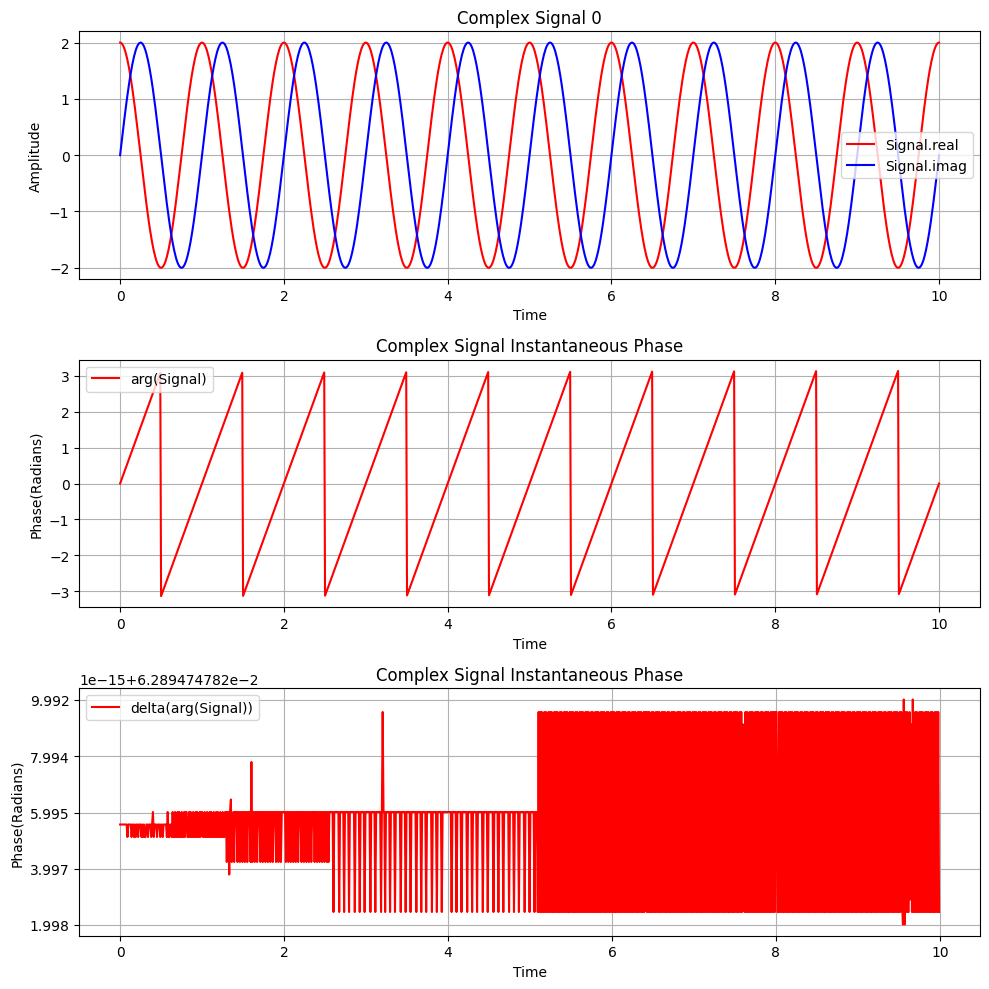

In [44]:
sample_rate = 100
duration_secs = 10
f = 1.0
A = 2.0

def phi(t):
    return 0

T = np.linspace(0,duration_secs, sample_rate*duration_secs)

x_0 = []
for t in T:
    x_0.append(
        A * np.e ** (1.0j * (2 * np.pi * f * t + phi(t)))
    )
x_0 = np.asarray(x_0)

# PLOT
fig, (ax_sig_0, ax_phase, ax_phase_delta) = plt.subplots(3, figsize=(10,10))

# Plot signal_0
ax_sig_0.plot(T,x_0.real, color="r", label="Signal.real")
ax_sig_0.plot(T,x_0.imag, color="b", label="Signal.imag")

ax_sig_0.set_title("Complex Signal 0")
ax_sig_0.set_xlabel("Time")
ax_sig_0.set_ylabel("Amplitude")
ax_sig_0.grid()
ax_sig_0.legend()

# Plot phase
ax_phase.plot(T,np.angle(x_0), color="r", label="arg(Signal)")

ax_phase.set_title("Complex Signal Instantaneous Phase")
ax_phase.set_xlabel("Time")
ax_phase.set_ylabel("Phase(Radians)")
ax_phase.grid()
ax_phase.legend()

# Plot phase delta
rotations = np.ediff1d(np.angle(x_0))
rotations = (rotations + np.pi) % (2 * np.pi) - np.pi
ax_phase_delta.plot(T[:-1],rotations, color="r", label="delta(arg(Signal))")

ax_phase_delta.set_title("Complex Signal Instantaneous Phase")
ax_phase_delta.set_xlabel("Time")
ax_phase_delta.set_ylabel("Phase(Radians)")
ax_phase_delta.grid()
ax_phase_delta.legend()

fig.tight_layout()

#  BPSK
This is honest to god BPSK. I don't really know what the phase diagram is saying tbh...

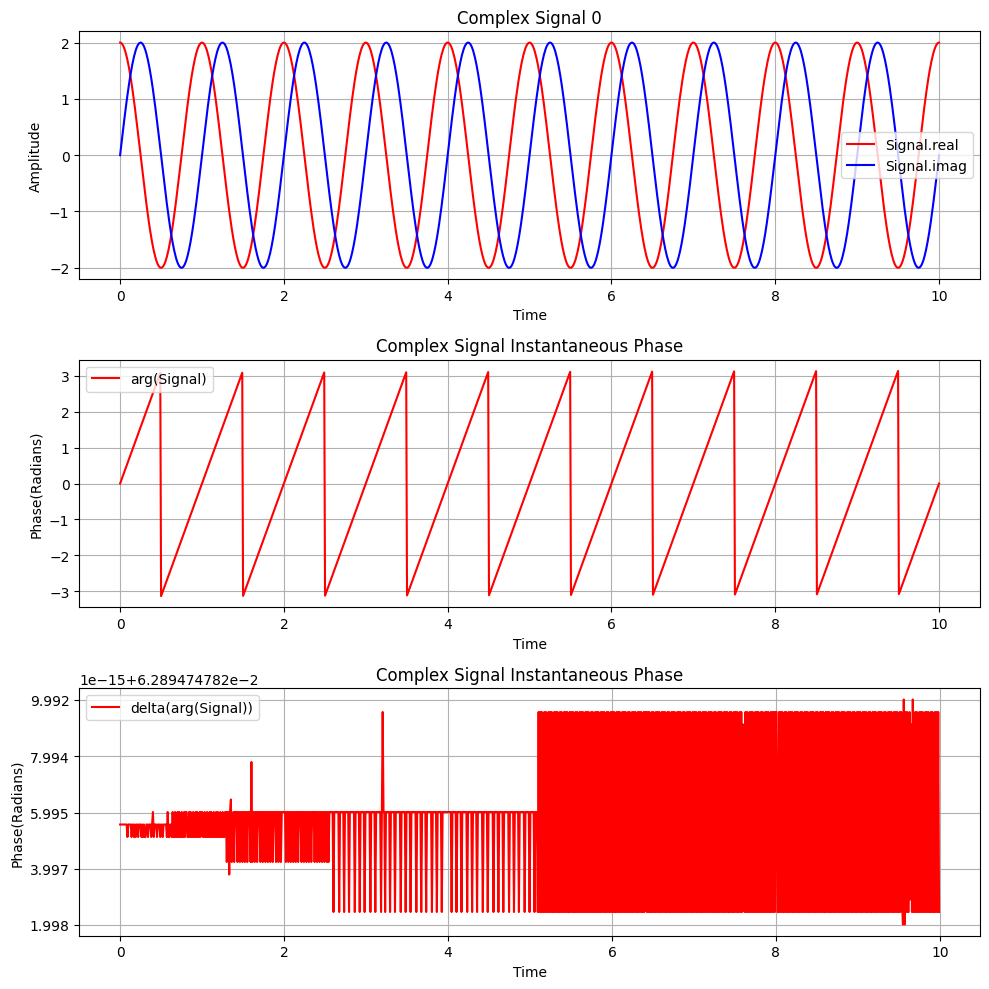

In [40]:
sample_rate = 100
duration_secs = 10
f = 1.0
A = 2.0

def phi(t):
    return 0
    if int(t) in [1,3,4]: return np.pi/2
    else: return 0


T = np.linspace(0,duration_secs, sample_rate*duration_secs)

x_0 = []
for t in T:
    x_0.append(
        A * np.e ** (1.0j * (2 * np.pi * f * t + phi(t)))
    )
x_0 = np.asarray(x_0)

# PLOT
fig, (ax_sig_0, ax_phase, ax_phase_delta) = plt.subplots(3, figsize=(10,10))

# Plot signal_0
ax_sig_0.plot(T,x_0.real, color="r", label="Signal.real")
ax_sig_0.plot(T,x_0.imag, color="b", label="Signal.imag")

ax_sig_0.set_title("Complex Signal 0")
ax_sig_0.set_xlabel("Time")
ax_sig_0.set_ylabel("Amplitude")
ax_sig_0.grid()
ax_sig_0.legend()

# Plot phase
ax_phase.plot(T,np.angle(x_0), color="r", label="arg(Signal)")

ax_phase.set_title("Complex Signal Instantaneous Phase")
ax_phase.set_xlabel("Time")
ax_phase.set_ylabel("Phase(Radians)")
ax_phase.grid()
ax_phase.legend()

# Plot phase delta
rotations = np.ediff1d(np.angle(x_0))
rotations = (rotations + np.pi) % (2 * np.pi) - np.pi
ax_phase_delta.plot(T[:-1],rotations, color="r", label="delta(arg(Signal))")

ax_phase_delta.set_title("Complex Signal Instantaneous Phase")
ax_phase_delta.set_xlabel("Time")
ax_phase_delta.set_ylabel("Phase(Radians)")
ax_phase_delta.grid()
ax_phase_delta.legend()

fig.tight_layout()

In [ ]:
angles = np.angle(X)
rotations = np.ediff1d(angles)

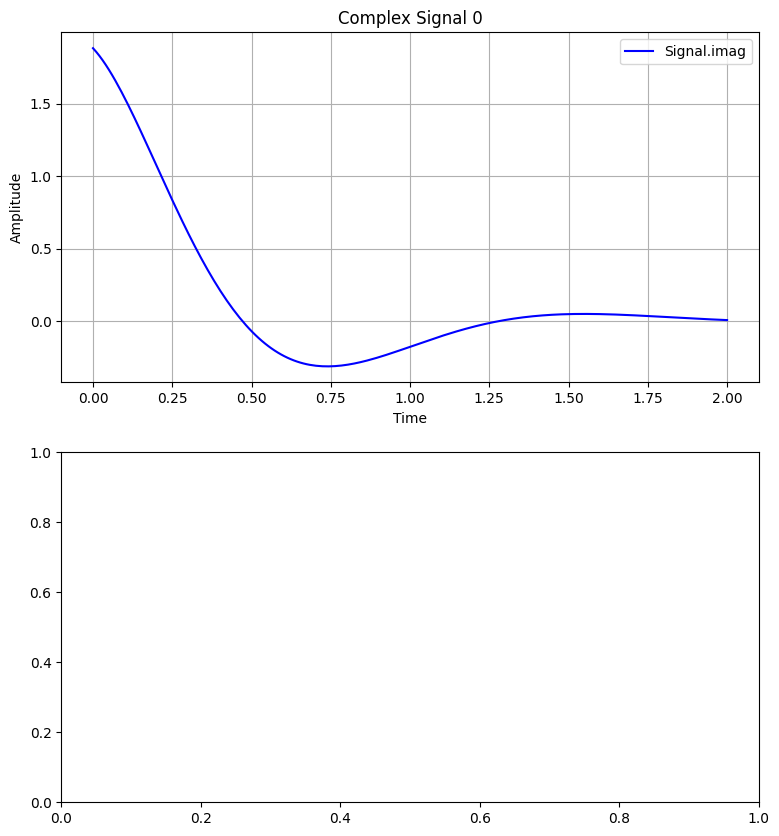

In [13]:
class SimPLL(object):
    def __init__(self, lf_bandwidth):
        self.phase_out = 0.0
        self.freq_out = 0.0
        self.vco = np.exp(1j*self.phase_out)
        self.phase_difference = 0.0
        self.bw = lf_bandwidth
        self.beta = np.sqrt(lf_bandwidth)

    def update_phase_estimate(self):
        self.vco = np.exp(1j*self.phase_out)

    def update_phase_difference(self, in_sig):
        self.phase_difference = np.angle(in_sig*np.conj(self.vco))

    def step(self, in_sig):
        # Takes an instantaneous sample of a signal and updates the PLL's inner state
        self.update_phase_difference(in_sig)
        self.freq_out += self.bw * self.phase_difference
        self.phase_out += self.beta * self.phase_difference + self.freq_out
        self.update_phase_estimate()
        
        
diff = []
pll = SimPLL(0.002)
for t in T:
    x_i = A * np.e ** (1.0j * (2 * np.pi * f * t + phi))
    pll.step(x_i)
    diff.append(pll.phase_difference)
    
# PLOT
fig, (ax_sig_0, ax_sig_1) = plt.subplots(2, figsize=(9,10))

# Plot signal_0
# ax_sig_0.plot(T,x_1, color="r", label="Signal.real")
ax_sig_0.plot(T,np.asarray(diff), color="b", label="Signal.imag")

ax_sig_0.set_title("Complex Signal 0")
ax_sig_0.set_xlabel("Time")
ax_sig_0.set_ylabel("Amplitude")
ax_sig_0.grid()
ax_sig_0.legend()